In [86]:
import matplotlib.pyplot as plt
import pandas as pd
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', 10)

In [3]:
data = pd.read_csv('../data/alura_PythonPandas-tratando-e-analisando-dados/aluguel.csv', sep=';')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [5]:
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [6]:
data_types = pd.DataFrame(data.dtypes, columns=['Type'])
data_types.columns.name = 'Variables'
data_types

Variables,Type
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [7]:
print(f'''A base de dados apresenta:
{data.shape[0]} linhas
{data.shape[1]} colunas''')

A base de dados apresenta:
32960 linhas
9 colunas


In [8]:
property_type = data.Tipo.value_counts()
property_type

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

In [9]:
df_pt = pd.DataFrame(property_type)
df_pt.rename(columns={'Tipo':'Count'}, inplace=True)
df_pt.columns.name = 'Type'

In [10]:
df_pt

Type,Count
Apartamento,19532
Conjunto Comercial/Sala,6815
Loja/Salão,1426
Casa de Condomínio,996
Casa,967
Quitinete,836
Galpão/Depósito/Armazém,623
Flat,476
Prédio Inteiro,301
Casa Comercial,265


In [11]:
data.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [13]:
residential = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [16]:
data_residential = data[data['Tipo'].isin(residential)]

In [19]:
data_residential.Tipo.value_counts()

Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Casa de Vila            249
Name: Tipo, dtype: int64

In [20]:
print(f'''A base de dados apresenta:
{data_residential.shape[0]} linhas
{data_residential.shape[1]} colunas''')

A base de dados apresenta:
22580 linhas
9 colunas


In [22]:
data_residential.reset_index(inplace=True)

In [23]:
data_residential

,index,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22575,32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [59]:
var = data.Bairro.value_counts()[:5].index
var

Index(['Barra da Tijuca', 'Centro', 'Copacabana', 'Ipanema',
       'Recreio dos Bandeirantes'],
      dtype='object')

In [78]:
selection = data.Bairro.isin(var)
top5bairros = data[selection].groupby('Bairro')

In [80]:
group_bairro_agg = top5bairros.agg({'Valor':'mean', 'Condominio':'mean'}).round(2)
group_bairro_agg

,Valor,Condominio
Bairro,,
Barra da Tijuca,9019.59,3599.17
Centro,19004.97,5247.40
Copacabana,4509.83,1211.94
Ipanema,10456.52,2360.60
Recreio dos Bandeirantes,3790.12,941.65


In [81]:
group_bairro_wagg = top5bairros[['Valor','Condominio']].mean().round(2)
group_bairro_wagg

,Valor,Condominio
Bairro,,
Barra da Tijuca,9019.59,3599.17
Centro,19004.97,5247.40
Copacabana,4509.83,1211.94
Ipanema,10456.52,2360.60
Recreio dos Bandeirantes,3790.12,941.65


In [83]:
top5bairros['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6256.0,9019.59,30192.24,100.0,2000.0,3500.0,8000.0,738197.0
Centro,3258.0,19004.97,59355.76,90.0,1000.0,3705.5,15000.0,950000.0
Copacabana,3185.0,4509.83,6413.41,100.0,1900.0,3000.0,4900.0,198000.0
Ipanema,2233.0,10456.52,20859.22,100.0,4000.0,7000.0,12000.0,800000.0
Recreio dos Bandeirantes,2127.0,3790.12,27447.80,100.0,1600.0,2100.0,3000.0,1250000.0


In [85]:
top5bairros['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo','sum':'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,100.0,738197.0,56426579.0
Centro,90.0,950000.0,61918200.0
Copacabana,100.0,198000.0,14363823.0
Ipanema,100.0,800000.0,23349404.0
Recreio dos Bandeirantes,100.0,1250000.0,8061575.0


In [87]:
%matplotlib inline
plt.rc('figure', figsize=(20,10))

<AxesSubplot: xlabel='Bairro'>

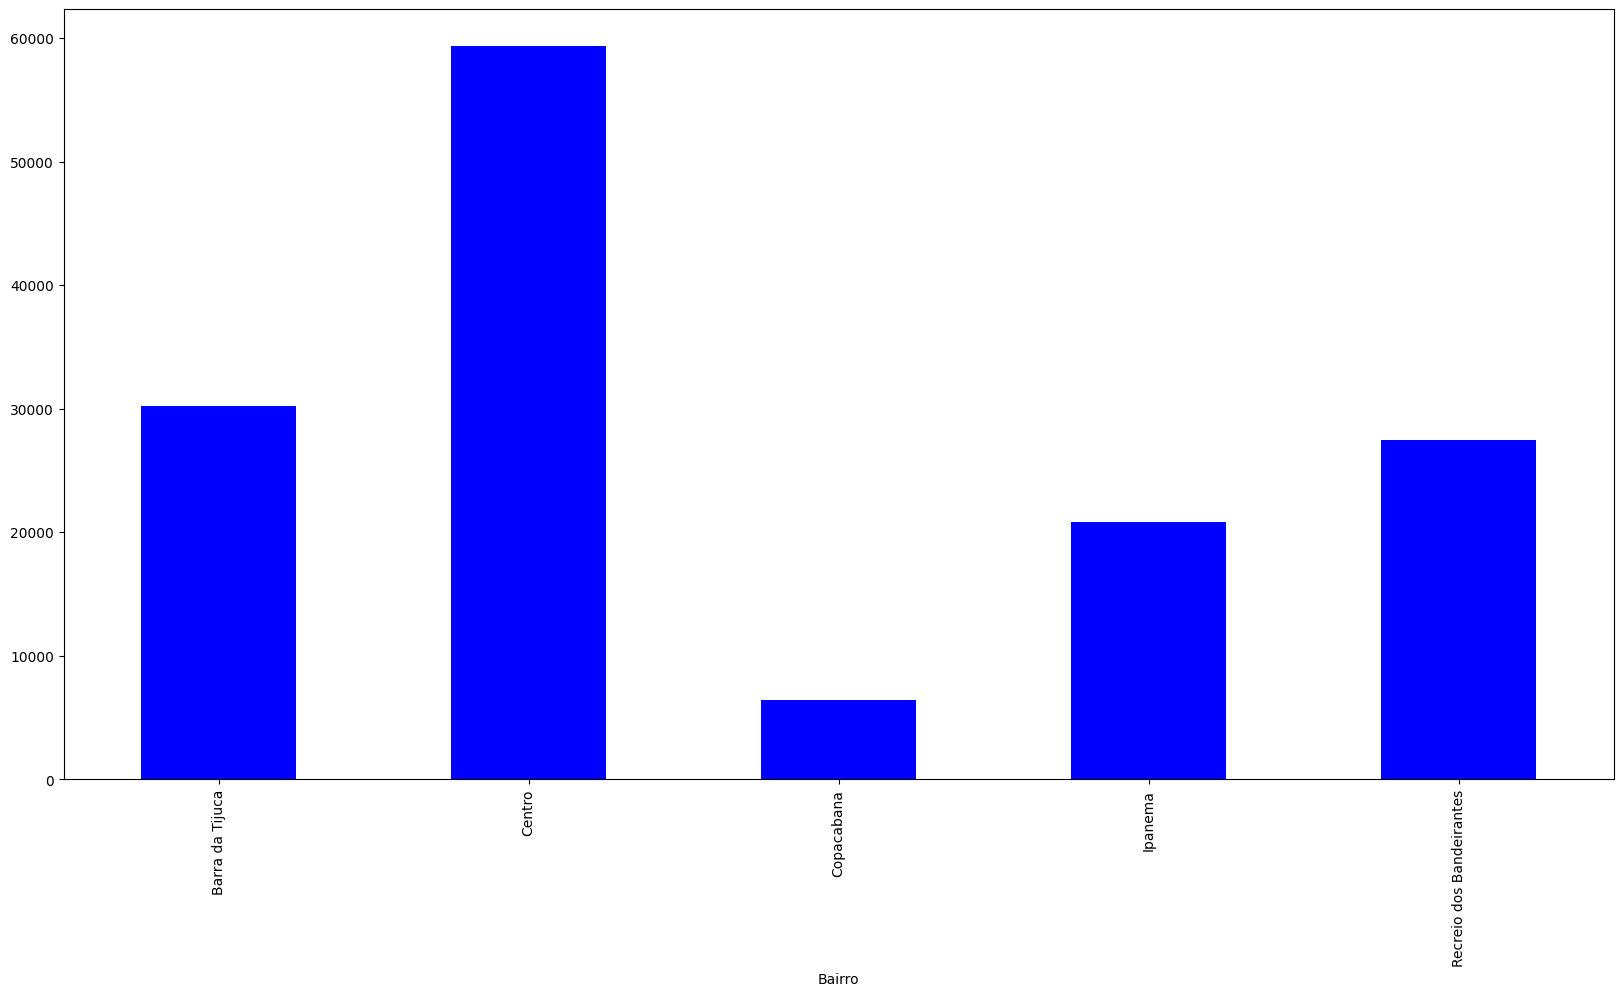

In [88]:
top5bairros['Valor'].std().plot.bar(color='blue')

<AxesSubplot: xlabel='Bairro'>

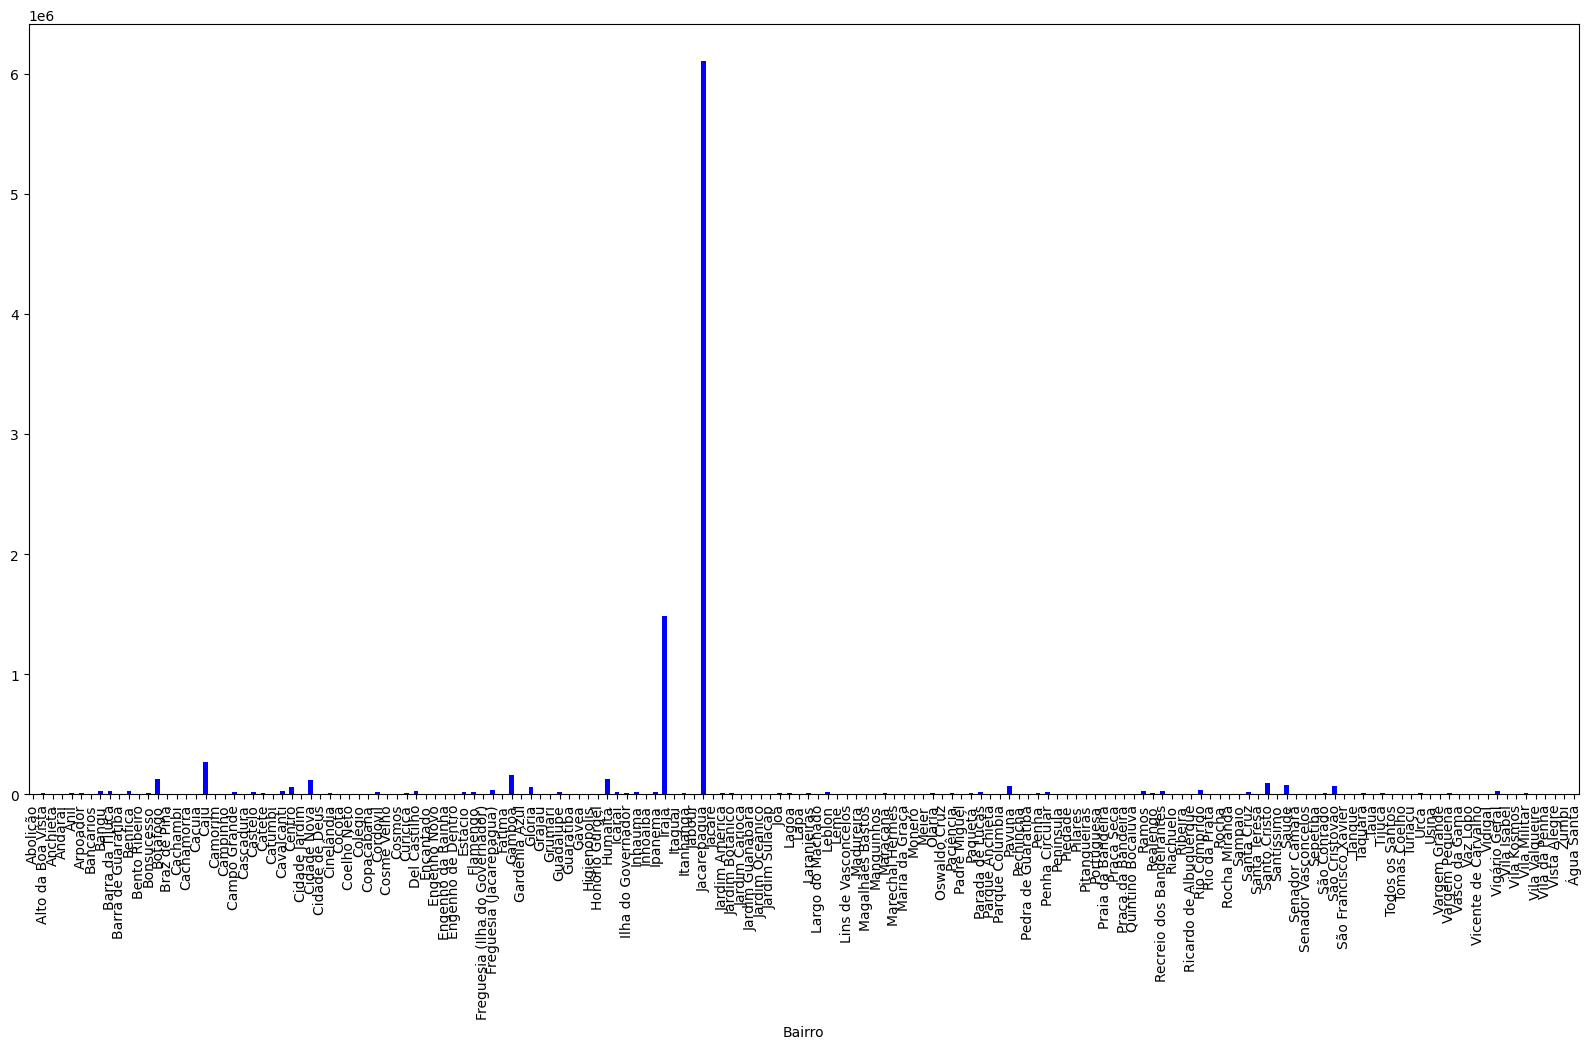

In [91]:
data.groupby('Bairro')['Valor'].std().plot.bar(color='blue')

In [109]:
data.groupby('Bairro')['Valor'].describe().loc['Jacarepaguá',:]

count    3.860000e+02
mean     3.141435e+05
std      6.107678e+06
min      1.000000e+02
25%      1.100000e+03
50%      1.600000e+03
75%      2.400000e+03
max      1.200000e+08
Name: Jacarepaguá, dtype: float64

In [115]:
classes = [0, 2, 4, 6, 100]
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais' ]
quartos = pd.cut(data.Quartos, classes, labels = labels)

In [116]:
pd.value_counts(quartos)

1 e 2 quartos        12419
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64